# PyTorch Computer Vision

Github Book: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb

Reference Online Book: https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer Vision libraries in PyTorch

- [`torchvision`](https://docs.pytorch.org/vision/0.17/): base domain library for PyTorch computer vision
- `torchvision.datasets`: get datasets and data loading functions for computer vision here
- `torchvision.model`: get pre-trained computer vision models that you can leverage for your own problems
- `torchvision.transforms`: functions for manipulating your vision data (images) to be suitable for use with an ML model
- `torch.utils.data.Dataset`: base dataset class for PyTorch
- `torch.utils.data.DataLoader`: creates a python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

PyTorch version: 2.7.0+cu126
Torchvision version: 0.22.0+cu126


## 1. Getting a dataset

The dataset we'll be using is FashionMNist from torchvision.dataset

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root='data',  # where to download data to
    train=True,  # do we want the training dataset?
    download=True,  # do we want to download?
    transform=ToTensor(),  # how do we want to transform the data?
    target_transform=None, 
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

print(f"Train samples: {len(train_data)}, Test samples: {len(test_data)}")


Train samples: 60000, Test samples: 10000


In [3]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {label} {class_names[label]}") 


Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: 9 Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

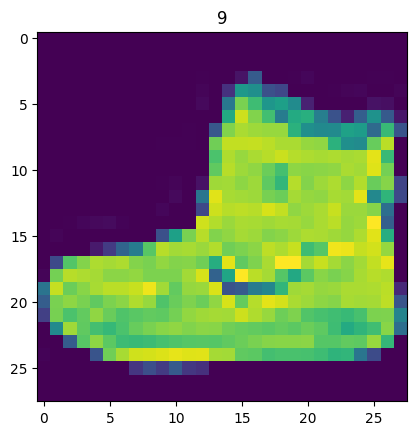

In [7]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

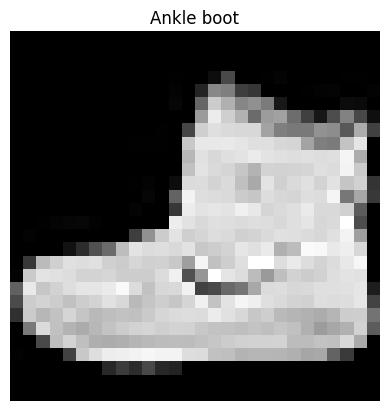

In [8]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
plt.show()


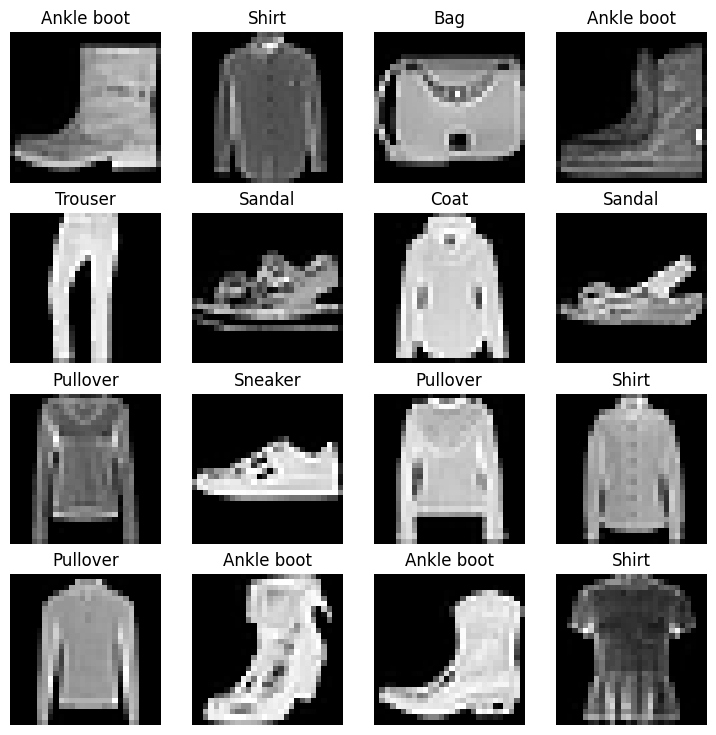

In [9]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? Or you think we'll need non-linearities?

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets

DataLoader turns our dataset into a Python iterable

More specifically, we want to turn our data into batches (or mini-batches)

Why would we do this?

1. It is more computationally efficient, as in your computing hardware may not be able to look (store in memory) at 60000 images in one hit.
So we break it down to 32 images at a time (batch size of 32)

2. It gives our neural network more chances to update its gradients per epoch


In [10]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

In [11]:
# Let's check out what we've created
print(f"DataLoaders : {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE} ")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x78ea27b427b0>, <torch.utils.data.dataloader.DataLoader object at 0x78ea169a9d10>)
Length of train_dataloader: 1875 batches of 32 
Length of test_dataloader: 313 batches of 32


In [12]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 6


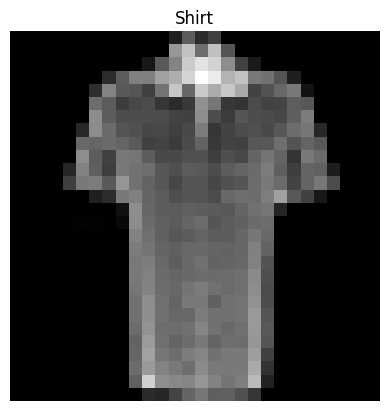

In [13]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label: {label}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice
to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other words: start simply and add complexity when necessary

In [14]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample

x = train_features_batch[0]

# Let's flatten the sample
output = flatten_model(x)

# Print out what happened:
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [15]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # flattens input into a single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)
    

In [16]:
torch.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"

# Setup model
model_0 = FashionMNISTModelV0(input_shape=784,  # 28 * 28
                              hidden_units=10,
                              output_shape=len(class_names))

model_0.to(device)

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x), model_0.state_dict()

(tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
          -0.1004,  0.0157]], grad_fn=<AddmmBackward0>),
 OrderedDict([('layer_stack.1.weight',
               tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                       [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                       [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                       ...,
                       [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                       [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                       [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
              ('layer_stack.1.bias',
               tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                        0.0018,  0.0163])),
              ('layer_stack.2.weight',
               tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.210

### 3.1 Setup loss, optimizer and evaluation metrics

- **Loss function**: since we're working with multi-class data, our loss function will be
`nn.CrossEntropyLoss()`
- **Optimizer**: our  optimizer `torch.optim.SGD()` (schocastic gradient descent)
- **Evaluation metric**: since we're working on a classification problem, let's use accuracy as 
our evalutation metrics

In [18]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as file:
        file.write(request.content)

helper_functions.py already exists


In [19]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values, etc)
2. How fast it runs 

In [20]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    return f"Train time on {device}, {total_time:.10f} seconds"

In [21]:
start_time = timer()
# some code here...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

'Train time on cpu, 0.0000279230 seconds'

In [22]:
### UP TO HERE: 3.3 Creating a training loop and training a model on batches of data.
# Hightlight that the optimizer will updte a model's parameters once per batch rather than once per epoch

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all.

In [23]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n-----")

    ### Training 
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):  # (image, label)
        model_0.train()

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch) 
        loss = loss_fn(y_pred, y)
        train_loss += loss  # accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")
    
    # Divide total train los sby length of train dataloader
    train_loss /= len(train_dataloader)


    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)
    
    # Print out what's happening 
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")


# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

/home/shiba/Desktop/PyTorch for Deep Learning in 2023 Zero to Mastery/00. Repository/PyTorch-For-Deep-Learning-Bootcamp/.env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 33%|███▎      | 1/3 [00:05<00:10,  5.24s/it]


Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch 1
-----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 67%|██████▋   | 2/3 [00:10<00:05,  5.23s/it]


Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch 2
-----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


100%|██████████| 3/3 [00:15<00:00,  5.27s/it]


Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265


## 4. Make predictions and get Model 0 resuts

In [24]:
torch.manual_seed(42)


def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    """Returns a dictionary ocntaining the results of model predicting on data_loader"""

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc to find average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

100%|██████████| 313/313 [00:00<00:00, 496.00it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [25]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

## 6. Model 1: Building a better model with non-linearity


In [26]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, in_shape: int, out_shape: int, hidden_units: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=in_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_shape),
            nn.ReLU(),
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [27]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = FashionMNISTModelV1(in_shape=784,
                              hidden_units=10,
                              out_shape=len(class_names)).to(device)

next(model_1.parameters()).device
                        

device(type='cpu')

### 6.1 Loss and Optimizer

In [28]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                             lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
- training loop: `train_step()`
- test loop: `test_step()`

In [29]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs training with model trying to learn on `data_loader`"""

    train_loss, train_acc = 0, 0

    model.train()
    for batch, (X_train, y_train), in enumerate(data_loader):

        # Put data on target device
        X_train, y_train = X_train.to(device), y_train.to(device)

        # Forward pass (outputs the raw logits from the model)
        y_pred = model(X_train)

        loss = loss_fn(y_pred, y_train)
        train_loss += loss
        train_acc += accuracy_fn(y_train, y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}")

In [30]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              accuracy_fn,
              device: torch.device = device):
    """Performs testing with model trying to learn on `data_loader`"""

    test_loss, test_acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            test_pred = model(X_test)

            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}")

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} ----")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    test_step(model=model_1,
              data_loader=test_dataloader,
              accuracy_fn=accuracy_fn,
              device=device)
    
    
end_time = timer()
total_train_time_model_1 = print_train_time(start_time, end_time, device)
print(total_train_time_model_1)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 ----
Train loss: 1.09199 | Train accuracy: 61.34


 33%|███▎      | 1/3 [00:05<00:10,  5.46s/it]

Test loss: 0.95636 | Test accuracy: 65.00
Epoch: 1 ----
Train loss: 0.78101 | Train accuracy: 71.93


 67%|██████▋   | 2/3 [00:10<00:05,  5.49s/it]

Test loss: 0.72227 | Test accuracy: 73.91
Epoch: 2 ----
Train loss: 0.67027 | Train accuracy: 75.94


100%|██████████| 3/3 [00:16<00:00,  5.52s/it]

Test loss: 0.68500 | Test accuracy: 75.02
Train time on cpu, 16.5578499180 seconds


In [32]:
model_0_results, total_train_time_model_0

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.4766390025615692,
  'model_acc': 83.42651757188499},
 'Train time on cpu, 15.7981139790 seconds')

> **Note:** Sometimes, depending on your data/hardware, you might find that your model trains faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU. 
> 2. The hardware you're using has a better CPU in terms of compute capability then the GPU
> For more on how to make your models computer faster, see here: https://horace.io/brrr_intro.html

In [33]:
# Get model_1 results dictionary

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

100%|██████████| 313/313 [00:00<00:00, 479.73it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

## 7. Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets

CNN's are known for their capabilities to find patterns in visual data

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [34]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website
    """
    def __init__(self, in_shape: int, hidden_units: int, out_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=in_shape,
                      out_channels=hidden_units,
                      kernel_size=3, 
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3, 
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7,  # there's a trick to calculating this
                      out_features=out_shape)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1 {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2 {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of conv_block_2 {x.shape}")
        
        return(x)

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = FashionMNISTModelV2(in_shape=1,
                              hidden_units=10,
                              out_shape=len(class_names)).to(device)

In [36]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.1 Stepping through `nn.Conv2d()`

In [37]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3 ,64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single batch shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single batch shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [38]:
# Create  a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                        out_channels=10,
                        kernel_size=3,
                        stride=1,
                        padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output, conv_output.shape
                        

(tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
            6.6224e-01, -2.3216e-01],
          [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
           -1.8552e-01, -5.7622e-01],
          [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
            1.4923e-01,  1.4236e-01],
          ...,
          [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
            4.2594e-01, -4.8341e-01],
          [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
           -3.6626e-01,  3.5645e-01],
          [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
           -4.9680e-01, -7.2258e-01]],
 
         [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
           -1.7643e+00,  2.5263e-01],
          [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
            4.8068e-01,  8.4869e-01],
          [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
            2.4611e-01,  6.6233e-01],
          ...,
    

### 7.2 Stepping through `nn.Maxpool2d()`

In [39]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension shape: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.Maxpool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through jsut the conv layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension shape: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])


In [40]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions
random_tensor = torch.randn(size=(1, 1, 2, 2))

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)

print(f"Before max pool: \n{random_tensor}") 
print(f"After max pool: \n{max_pool_tensor}") 

Before max pool: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
After max pool: 
tensor([[[[0.3367]]]])


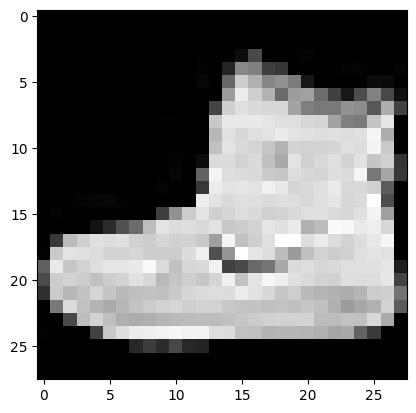

In [41]:
plt.imshow(image.squeeze(), cmap="gray")

In [42]:
image.shape

torch.Size([1, 28, 28])

In [43]:
# Pass image through model
model_2(image.unsqueeze(0))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

### 7.3 Setup a loss function and optimizer for `model_2`

In [44]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our trianing and test functions

In [45]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n--------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_2,
              data_loader=test_dataloader,
              accuracy_fn=accuracy_fn,
              device=device)
    
end_time = timer()
total_train_time_model_2 = print_train_time(start_time, end_time, device=device)
print(total_train_time_model_2)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
--------
Train loss: 0.59765 | Train accuracy: 78.34


 33%|███▎      | 1/3 [00:13<00:26, 13.14s/it]

Test loss: 0.39174 | Test accuracy: 85.89
Epoch 1
--------
Train loss: 0.36025 | Train accuracy: 87.07


 67%|██████▋   | 2/3 [00:26<00:13, 13.37s/it]

Test loss: 0.35624 | Test accuracy: 86.38
Epoch 2
--------
Train loss: 0.32263 | Train accuracy: 88.33


100%|██████████| 3/3 [00:40<00:00, 13.59s/it]

Test loss: 0.32829 | Test accuracy: 88.01
Train time on cpu, 40.7589022340 seconds


In [46]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)


print(f"\nBaseline model:\n{model_0_results}")
print(f"\nCNN model:\n{model_2_results}")

100%|██████████| 313/313 [00:01<00:00, 265.59it/s]


Baseline model:
{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.4766390025615692, 'model_acc': 83.42651757188499}

CNN model:
{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.32828739285469055, 'model_acc': 88.00918530351437}


## 8. Compare model results and training time

In [47]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.328287,88.009185


In [49]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,"Train time on cpu, 15.7981139790 seconds"
1,FashionMNISTModelV1,0.685001,75.019968,"Train time on cpu, 16.5578499180 seconds"
2,FashionMNISTModelV2,0.328287,88.009185,"Train time on cpu, 40.7589022340 seconds"


Text(0, 0.5, 'Model')

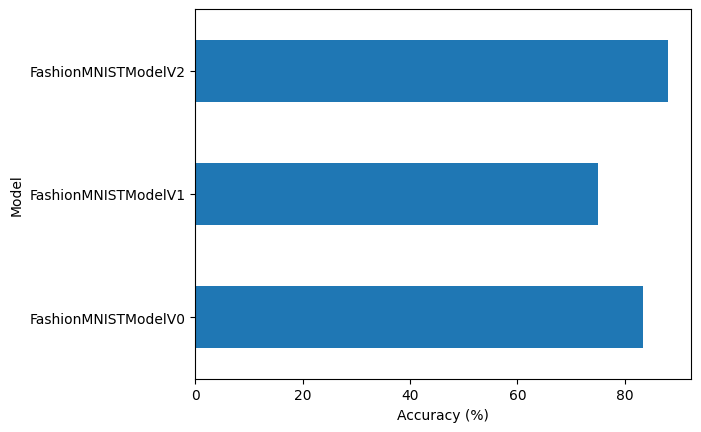

In [51]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")

## 9. Make and evaluate random predicitons with the best model

In [53]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
    
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())


    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [86]:
import random

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

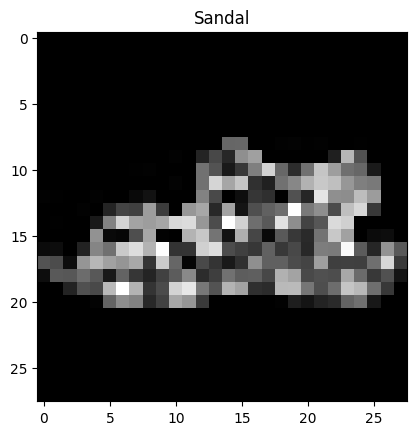

In [87]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [88]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View the first two prediction probabilities
pred_probs[:2]

tensor([[1.1558e-06, 3.1140e-06, 5.0767e-06, 1.1609e-05, 2.2602e-05, 9.9918e-01,
         2.9288e-06, 2.4753e-04, 8.5174e-05, 4.4327e-04],
        [1.9795e-03, 2.7450e-06, 5.6414e-02, 2.7512e-04, 8.3728e-02, 6.5566e-07,
         8.5751e-01, 1.0385e-06, 7.8162e-05, 1.4641e-05]])

In [89]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
print(f"Preditions: {pred_classes}")
print(f"Ground truth: {test_labels}")

Preditions: tensor([5, 6, 6, 6, 3, 1, 4, 3, 6])
Ground truth: [5, 6, 6, 4, 3, 1, 4, 6, 6]


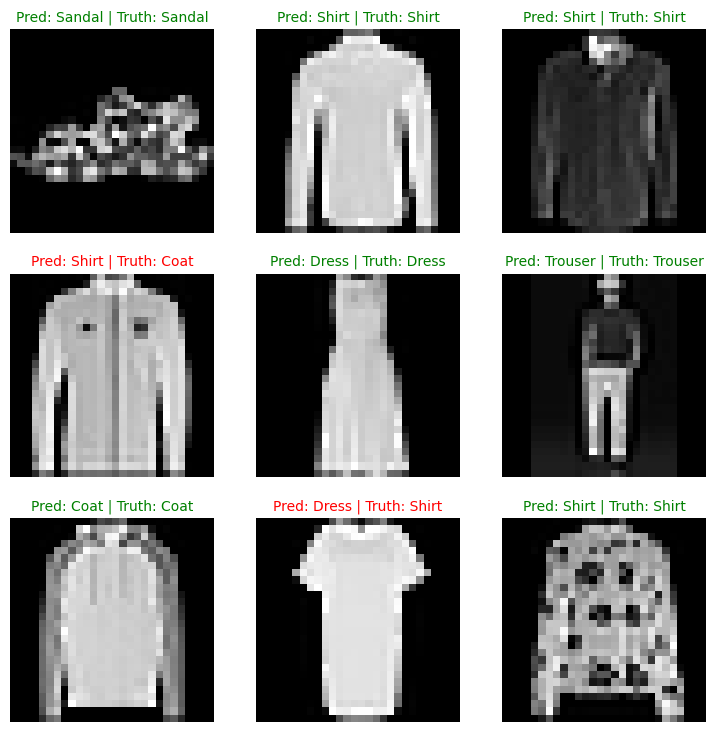

In [91]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction (in text form, e.g. "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")  # green text if prediction is correct
    else:
        plt.title(title_text, fontsize=10, c="r")  # red text if prediction is incorrect

    plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model

y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)

        # Do the forward pass
        y_logit = model_2(X)

        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())


print(f"y_preds: \n{y_preds}\n")
y_preds_tensor = torch.cat(y_preds)
print(f"y_preds_tensor: \n {y_preds_tensor}")


Making predictions...: 100%|██████████| 313/313 [00:01<00:00, 294.78it/s]

y_preds: 
[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 3, 2, 2, 8, 0, 2, 5, 7, 5,
        1, 2, 6, 3, 9, 4, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 3, 4, 6, 4, 6, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 6, 2, 6, 4, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 3, 8]), tensor([6, 1, 2, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([5, 2, 3, 8, 0, 9, 4, 8, 4, 2, 6, 5, 6, 1, 2, 1, 3, 6, 8, 1, 0, 9, 3, 6,
        7, 8, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 6, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 4, 9, 2, 2, 8, 6, 4,
        3, 4, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 2, 0, 6, 3, 8, 9, 6, 1, 3, 6, 2, 3, 0, 8, 3, 7, 

In [99]:
len(y_preds_tensor)

10000

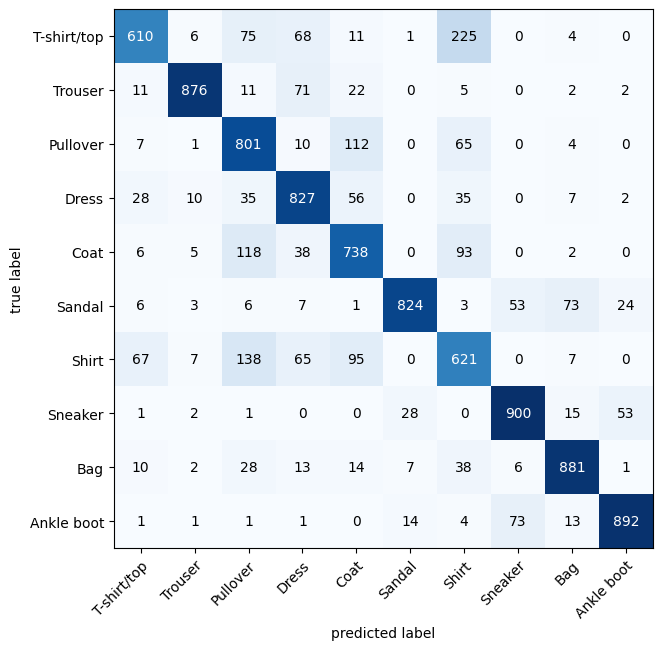

In [107]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

# 2. Setup confusion instance and compare predictions to targets

conf_mat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
conf_mat_tensor = conf_mat(y_preds_tensor, test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_tensor.numpy(),  # matplotlib likes working with numpy
                                class_names=class_names,
                                figsize=(10, 7))

## 11. Save and load the model

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [111]:
# Create a new instance
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(in_shape=1,
                                     hidden_units=10,
                                     out_shape=len(class_names)).to(device)

# Load the saved state_dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.3501,  0.3492, -0.3754],
                        [ 0.1467,  0.1857,  0.1039],
                        [-0.3536,  0.1701,  0.3563]]],
              
              
                      [[[-0.4619,  0.5180, -0.0202],
                        [ 0.0644,  0.3722,  0.3192],
                        [ 0.0017,  0.3530,  0.0934]]],
              
              
                      [[[-0.3727, -0.0906,  0.0204],
                        [-0.6148, -0.5657,  0.2577],
                        [-0.7661, -0.5807, -0.1050]]],
              
              
                      [[[-0.7999, -1.0996, -0.5709],
                        [ 0.2474, -0.8410,  0.1291],
                        [ 0.3281, -0.0233,  0.4847]]],
              
              
                      [[[-0.0973,  0.3329,  0.0627],
                        [-0.2643,  0.1336, -0.1197],
                        [-0.0164,  0.2191,  0.1383]]],
              
              
      

In [108]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32828739285469055,
 'model_acc': 88.00918530351437}

In [112]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_2_results

100%|██████████| 313/313 [00:01<00:00, 263.25it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32828739285469055,
 'model_acc': 88.00918530351437}

In [113]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)